# 4.1 Importing and merging original data


In [66]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

df1 = pd.read_excel('International_Financial_Statistics_Germany.xlsx') # importing the Germany dataset
df2= pd.read_excel('International_Financial_Statistics_United_States.xlsx') # importing the US dataset

# You need to change the path file of excel to the one matched on your device to run all the code 
print(df1)
print(df2)

pd.set_option('display.max_rows', None)

  International Financial Statistics (IFS)  \
0                                      NaN   
1                                  Germany   
2                                  Germany   
3                                  Germany   
4                                  Germany   

                                          Unnamed: 1   Unnamed: 2  Unnamed: 3  \
0                                                NaN     Jan 1960    Feb 1960   
1    Economic Activity, Industrial Production, Index    31.214706   31.062322   
2  Exchange Rates, National Currency Per U.S. Dol...          4.2         4.2   
3  International Reserves and Liquidity, Reserves...  4724.155785  4806.36283   
4     Prices, Consumer Price Index, All items, Index    24.616929   24.477068   

    Unnamed: 4   Unnamed: 5   Unnamed: 6   Unnamed: 7   Unnamed: 8  \
0     Mar 1960     Apr 1960     May 1960     Jun 1960     Jul 1960   
1    32.225254    34.310512    33.749096    34.422795    32.369618   
2          4.2          4.

In [67]:
merged_df = pd.concat([df1, df2], ignore_index=True) # merge two dataset into one 

print(merged_df)

  International Financial Statistics (IFS)  \
0                                      NaN   
1                                  Germany   
2                                  Germany   
3                                  Germany   
4                                  Germany   
5                                      NaN   
6                            United States   
7                            United States   

                                          Unnamed: 1   Unnamed: 2  Unnamed: 3  \
0                                                NaN     Jan 1960    Feb 1960   
1    Economic Activity, Industrial Production, Index    31.214706   31.062322   
2  Exchange Rates, National Currency Per U.S. Dol...          4.2         4.2   
3  International Reserves and Liquidity, Reserves...  4724.155785  4806.36283   
4     Prices, Consumer Price Index, All items, Index    24.616929   24.477068   
5                                                NaN     Jan 1960    Feb 1960   
6  International R

In [68]:
merged_df = merged_df.drop(merged_df.index[5]) # drop the duplicate head line of US 
merged_df.reset_index(drop=True, inplace=True) # reset the index after 
display(merged_df)


,International Financial Statistics (IFS),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 364,Unnamed: 365,Unnamed: 366,Unnamed: 367,Unnamed: 368,Unnamed: 369,Unnamed: 370,Unnamed: 371,Unnamed: 372,Unnamed: 373
0,NaN,NaN,Jan 1960,Feb 1960,Mar 1960,Apr 1960,May 1960,Jun 1960,Jul 1960,Aug 1960,...,Mar 1990,Apr 1990,May 1990,Jun 1990,Jul 1990,Aug 1990,Sep 1990,Oct 1990,Nov 1990,Dec 1990
1,Germany,"Economic Activity, Industrial Production, Index",31.214706,31.062322,32.225254,34.310512,33.749096,34.422795,32.369618,31.174605,...,87.187838,79.833294,81.325056,81.814289,78.846807,76.015669,86.554241,92.705752,89.521723,83.867466
2,Germany,"Exchange Rates, National Currency Per U.S. Dol...",4.2,4.2,4.2,4.2,4.2,4.2,4.2,4.2,...,1.7045,1.6882,1.6617,1.684,1.6399,1.5707,1.5697,1.5233,1.487,1.492
3,Germany,"International Reserves and Liquidity, Reserves...",4724.155785,4806.36283,4966.456016,5236.120624,5417.091847,5843.766907,6124.728538,6358.680576,...,69567.698692,69701.98496,70727.723372,71640.079816,71072.396009,72425.738573,73197.573621,75011.92683,76166.074709,77064.207674
4,Germany,"Prices, Consumer Price Index, All items, Index",24.616929,24.477068,24.477068,24.616929,24.686864,24.686864,24.686864,24.686864,...,66.997227,67.137087,67.276959,67.346895,67.346895,67.556702,67.766509,68.256049,68.116177,68.186113
5,United States,"International Reserves and Liquidity, Reserves...",21478.1,21395.7,21344.7,21278,21234.3,21169.8,20999.4,20803.4,...,76303.02854,76283.21061,77028.366838,77298.843254,77906.286647,78908.838357,80024.166133,82852.196532,83059.402774,83316.214608
6,United States,"Prices, Consumer Price Index, All items, Index",13.436946,13.482806,13.482806,13.528666,13.528666,13.574526,13.574526,13.574526,...,59.021671,59.113391,59.250971,59.57199,59.801289,60.351608,60.856066,61.222946,61.360525,61.360525


In [69]:
merged_df.to_csv('merged_dataset.csv', index=False) # save the original dataset to csv file 

# 4.2 Generating variables 
## Germany's variables
### The monthly growth in the nominal exchange rate


In [70]:
exchange_rate_data = merged_df.iloc[2, 2:].astype(float) # select the matched row of data
exchange_rate_growth_rate = exchange_rate_data.pct_change() * 100 #calculate the monthly growth rate 
display(exchange_rate_growth_rate)


Unnamed: 2               NaN
Unnamed: 3      0.000000e+00
Unnamed: 4      0.000000e+00
Unnamed: 5      0.000000e+00
Unnamed: 6      0.000000e+00
Unnamed: 7      0.000000e+00
Unnamed: 8      0.000000e+00
Unnamed: 9      0.000000e+00
Unnamed: 10     0.000000e+00
Unnamed: 11     0.000000e+00
Unnamed: 12     0.000000e+00
Unnamed: 13     0.000000e+00
Unnamed: 14     0.000000e+00
Unnamed: 15     0.000000e+00
Unnamed: 16    -4.761905e+00
Unnamed: 17     0.000000e+00
Unnamed: 18     0.000000e+00
Unnamed: 19     0.000000e+00
Unnamed: 20     0.000000e+00
Unnamed: 21     0.000000e+00
Unnamed: 22     0.000000e+00
Unnamed: 23     0.000000e+00
Unnamed: 24     0.000000e+00
Unnamed: 25     0.000000e+00
Unnamed: 26     0.000000e+00
Unnamed: 27     0.000000e+00
Unnamed: 28     0.000000e+00
Unnamed: 29     0.000000e+00
Unnamed: 30     0.000000e+00
Unnamed: 31     0.000000e+00
Unnamed: 32     0.000000e+00
Unnamed: 33     0.000000e+00
Unnamed: 34     0.000000e+00
Unnamed: 35     0.000000e+00
Unnamed: 36   

In [71]:
growth_rate_df = pd.DataFrame(exchange_rate_growth_rate).reset_index() #save it as a dataframe
growth_rate_df.columns = ['Month', 'Monthly Growth of Nominal Exchange Rate (%)'] #change the title of the dataframe 
new_month_names = merged_df.iloc[0, 2:].values # fill the Month column with matched month data 
growth_rate_df['Month'] = new_month_names
growth_rate_df = growth_rate_df.fillna(0) # correct the NaN value to 0
display(growth_rate_df)

,Month,Monthly Growth of Nominal Exchange Rate (%)
0,Jan 1960,0.000000e+00
1,Feb 1960,0.000000e+00
2,Mar 1960,0.000000e+00
3,Apr 1960,0.000000e+00
4,May 1960,0.000000e+00
5,Jun 1960,0.000000e+00
6,Jul 1960,0.000000e+00
7,Aug 1960,0.000000e+00
8,Sep 1960,0.000000e+00
9,Oct 1960,0.000000e+00


### The real exchange rate

In [72]:
real_exchange_rate = (merged_df.iloc[2, 2:]) * (merged_df.iloc[6, 2:]) / (merged_df.iloc[4, 2:])
#formula of real exchange rate = (nominal exchange rate)*(price index of US)/(price index of Germany)


In [73]:
real_exchange_rate_df = pd.DataFrame(real_exchange_rate).reset_index() # repeat the constructing steps above
real_exchange_rate_df.columns = ['Month', 'Real Exchange Rate (%)']
new_month_names = merged_df.iloc[0, 2:].values
real_exchange_rate_df['Month'] = new_month_names
display(real_exchange_rate_df)

,Month,Real Exchange Rate (%)
0,Jan 1960,2.292535
1,Feb 1960,2.313504
2,Mar 1960,2.313504
3,Apr 1960,2.308184
4,May 1960,2.301645
5,Jun 1960,2.309447
6,Jul 1960,2.309447
7,Aug 1960,2.309447
8,Sep 1960,2.316008
9,Oct 1960,2.325052


### The monthly growth in the real exchange rate

In [74]:
monthly_real_er_data = real_exchange_rate.pct_change() * 100
display(monthly_real_er_data)

/var/folders/yk/0cbcv2t90ssg8wcsbt3gj0q00000gn/T/ipykernel_1105/1032413488.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  monthly_real_er_data = real_exchange_rate.pct_change() * 100


Unnamed: 2           NaN
Unnamed: 3      0.914640
Unnamed: 4      0.000000
Unnamed: 5     -0.229943
Unnamed: 6     -0.283291
Unnamed: 7      0.338983
Unnamed: 8      0.000000
Unnamed: 9      0.000000
Unnamed: 10     0.284096
Unnamed: 11     0.390470
Unnamed: 12    -0.282491
Unnamed: 13     0.000000
Unnamed: 14    -0.840352
Unnamed: 15     0.000000
Unnamed: 16    -4.761905
Unnamed: 17     0.000000
Unnamed: 18    -0.833349
Unnamed: 19    -0.552452
Unnamed: 20     0.671141
Unnamed: 21    -0.333333
Unnamed: 22     0.334448
Unnamed: 23     0.000000
Unnamed: 24    -0.549461
Unnamed: 25     0.000000
Unnamed: 26    -1.086977
Unnamed: 27     0.061422
Unnamed: 28    -0.270232
Unnamed: 29     0.061784
Unnamed: 30     0.000000
Unnamed: 31     0.000000
Unnamed: 32     0.061413
Unnamed: 33     0.540551
Unnamed: 34     0.330033
Unnamed: 35    -0.269547
Unnamed: 36    -0.268822
Unnamed: 37    -0.534769
Unnamed: 38    -1.319243
Unnamed: 39    -0.785355
Unnamed: 40     0.328947
Unnamed: 41    -0.261101


In [75]:
monthly_real_er_data_df = pd.DataFrame(monthly_real_er_data).reset_index()
monthly_real_er_data_df.columns = ['Month', 'Monthly Growth in the Real Exchange Rate (%)']
new_month_names = merged_df.iloc[0, 2:].values
monthly_real_er_data_df['Month'] = new_month_names
monthly_real_er_data_df = monthly_real_er_data_df.fillna(0)
display(monthly_real_er_data_df)

,Month,Monthly Growth in the Real Exchange Rate (%)
0,Jan 1960,0.000000
1,Feb 1960,0.914640
2,Mar 1960,0.000000
3,Apr 1960,-0.229943
4,May 1960,-0.283291
5,Jun 1960,0.338983
6,Jul 1960,0.000000
7,Aug 1960,0.000000
8,Sep 1960,0.284096
9,Oct 1960,0.390470


### The monthly inflation rate Germany

In [76]:
monthly_inflation = merged_df.iloc[4, 2:].astype(float)
monthly_inflation_rate = monthly_inflation.pct_change() * 100
monthly_inflation_rate_df = pd.DataFrame(monthly_inflation_rate).reset_index()
monthly_inflation_rate_df.columns = ['Month', 'Monthly Inflation Rate Germany(%)']
new_month_names = merged_df.iloc[0, 2:].values
monthly_inflation_rate_df['Month'] = new_month_names
monthly_inflation_rate_df = monthly_inflation_rate_df.fillna(0)
display(monthly_inflation_rate_df)


,Month,Monthly Inflation Rate Germany(%)
0,Jan 1960,0.000000
1,Feb 1960,-0.568147
2,Mar 1960,0.000000
3,Apr 1960,0.571393
4,May 1960,0.284096
5,Jun 1960,0.000000
6,Jul 1960,0.000000
7,Aug 1960,0.000000
8,Sep 1960,-0.283291
9,Oct 1960,0.284096


### The monthly growth in Industrial Production

In [77]:
industrial_production = merged_df.iloc[1, 2:].astype(float)
industrial_production_rate = industrial_production.pct_change() * 100
industrial_production_rate_df = pd.DataFrame(industrial_production_rate).reset_index()
industrial_production_rate_df.columns = ['Month', 'Monthly Growth in Industrial Production (%)']
new_month_names = merged_df.iloc[0, 2:].values
industrial_production_rate_df['Month'] = new_month_names
industrial_production_rate_df = industrial_production_rate_df.fillna(0)
display(industrial_production_rate_df)


,Month,Monthly Growth in Industrial Production (%)
0,Jan 1960,0.000000
1,Feb 1960,-0.488181
2,Mar 1960,3.743868
3,Apr 1960,6.470881
4,May 1960,-1.636279
5,Jun 1960,1.996198
6,Jul 1960,-5.964585
7,Aug 1960,-3.691774
8,Sep 1960,11.242604
9,Oct 1960,3.561517


### The growth in industrial production Versus 12 Months Ago 


In [78]:
import numpy as np

growth_industrial_production_12months = np.where(
    industrial_production_rate_df['Monthly Growth in Industrial Production (%)'].shift(12) == 0,
    0,  # Or np.nan if you prefer to treat these cases as undefined
    (industrial_production_rate_df['Monthly Growth in Industrial Production (%)'] - 
     industrial_production_rate_df['Monthly Growth in Industrial Production (%)'].shift(12)) / 
    industrial_production_rate_df['Monthly Growth in Industrial Production (%)'].shift(12)
) * 100
growth_industrial_production_12months_df = pd.DataFrame(growth_industrial_production_12months).reset_index()
growth_industrial_production_12months_df.columns = ['Month', 'Yearly Growth of Industrial Production (%)']
new_month_names = merged_df.iloc[0, 2:].values
growth_industrial_production_12months_df['Month'] = new_month_names
growth_industrial_production_12months_df = growth_industrial_production_12months_df.fillna(0)
display(growth_industrial_production_12months_df)

,Month,Yearly Growth of Industrial Production (%)
0,Jan 1960,0.000000
1,Feb 1960,0.000000
2,Mar 1960,0.000000
3,Apr 1960,0.000000
4,May 1960,0.000000
5,Jun 1960,0.000000
6,Jul 1960,0.000000
7,Aug 1960,0.000000
8,Sep 1960,0.000000
9,Oct 1960,0.000000


### Index of internatonal reserve Germany


In [79]:
international_reserves_data = merged_df.iloc[3, 2:].astype(float)
base_value = international_reserves_data.iloc[0]
international_reserves_index = (international_reserves_data / base_value) * 100
ir_index_df = pd.DataFrame(international_reserves_index).reset_index()
ir_index_df.columns = ['Month', 'International Reserve Index Germany']
new_month_names = merged_df.iloc[0, 2:].values
ir_index_df['Month'] = new_month_names
ir_index_df = ir_index_df.fillna(0)
display(ir_index_df)


,Month,International Reserve Index Germany
0,Jan 1960,100.000000
1,Feb 1960,101.740143
2,Mar 1960,105.128964
3,Apr 1960,110.837171
4,May 1960,114.667934
5,Jun 1960,123.699708
6,Jul 1960,129.647048
7,Aug 1960,134.599299
8,Sep 1960,140.623493
9,Oct 1960,145.612219


## US Variables
### Monthly inflation rate

In [80]:
monthly_inflation_US = merged_df.iloc[6, 2:].astype(float)
monthly_inflation_rate_US = monthly_inflation_US.pct_change() * 100
monthly_inflation_rate_US_df = pd.DataFrame(monthly_inflation_rate_US).reset_index()
monthly_inflation_rate_US_df.columns = ['Month', 'Monthly Inflation Rate US(%)']
new_month_names = merged_df.iloc[0, 2:].values
monthly_inflation_rate_US_df['Month'] = new_month_names
monthly_inflation_rate_US_df = monthly_inflation_rate_US_df.fillna(0)
display(monthly_inflation_rate_US_df)

,Month,Monthly Inflation Rate US(%)
0,Jan 1960,0.000000
1,Feb 1960,0.341297
2,Mar 1960,0.000000
3,Apr 1960,0.340136
4,May 1960,0.000000
5,Jun 1960,0.338983
6,Jul 1960,0.000000
7,Aug 1960,0.000000
8,Sep 1960,0.000000
9,Oct 1960,0.675676


### Index of International reserves 


In [81]:
international_reserves_data_US = merged_df.iloc[5, 2:].astype(float)
base_value = international_reserves_data_US.iloc[0]
international_reserves_index_US = (international_reserves_data_US / base_value) * 100
ir_index_US_df = pd.DataFrame(international_reserves_index_US).reset_index()
ir_index_US_df.columns = ['Month', 'International Reserve Index US']
new_month_names = merged_df.iloc[0, 2:].values
ir_index_US_df['Month'] = new_month_names
ir_index_US_df = ir_index_US_df.fillna(0)
display(ir_index_US_df)


,Month,International Reserve Index US
0,Jan 1960,100.000000
1,Feb 1960,99.616353
2,Mar 1960,99.378902
3,Apr 1960,99.068353
4,May 1960,98.864890
5,Jun 1960,98.564584
6,Jul 1960,97.771218
7,Aug 1960,96.858661
8,Sep 1960,95.120146
9,Oct 1960,93.435639


### Merging constructed variables 


In [82]:

final_merged_df = pd.concat([growth_rate_df, real_exchange_rate_df.drop('Month', axis=1), monthly_real_er_data_df.drop('Month', axis=1), monthly_inflation_rate_df.drop('Month', axis=1), industrial_production_rate_df.drop('Month', axis=1), growth_industrial_production_12months_df.drop('Month', axis=1),ir_index_df.drop('Month', axis=1), monthly_inflation_rate_US_df.drop('Month', axis=1), ir_index_US_df.drop('Month', axis=1)], axis=1)

#Show how many values are missing in each column
print(f'Missing values:\n{final_merged_df.isnull().sum()}')

display(final_merged_df)

Missing values:
Month                                           0
Monthly Growth of Nominal Exchange Rate (%)     0
Real Exchange Rate (%)                          0
Monthly Growth in the Real Exchange Rate (%)    0
Monthly Inflation Rate Germany(%)               0
Monthly Growth in Industrial Production (%)     0
Yearly Growth of Industrial Production (%)      0
International Reserve Index Germany             0
Monthly Inflation Rate US(%)                    0
International Reserve Index US                  0
dtype: int64


,Month,Monthly Growth of Nominal Exchange Rate (%),Real Exchange Rate (%),Monthly Growth in the Real Exchange Rate (%),Monthly Inflation Rate Germany(%),Monthly Growth in Industrial Production (%),Yearly Growth of Industrial Production (%),International Reserve Index Germany,Monthly Inflation Rate US(%),International Reserve Index US
0,Jan 1960,0.000000e+00,2.292535,0.000000,0.000000,0.000000,0.000000,100.000000,0.000000,100.000000
1,Feb 1960,0.000000e+00,2.313504,0.914640,-0.568147,-0.488181,0.000000,101.740143,0.341297,99.616353
2,Mar 1960,0.000000e+00,2.313504,0.000000,0.000000,3.743868,0.000000,105.128964,0.000000,99.378902
3,Apr 1960,0.000000e+00,2.308184,-0.229943,0.571393,6.470881,0.000000,110.837171,0.340136,99.068353
4,May 1960,0.000000e+00,2.301645,-0.283291,0.284096,-1.636279,0.000000,114.667934,0.000000,98.864890
5,Jun 1960,0.000000e+00,2.309447,0.338983,0.000000,1.996198,0.000000,123.699708,0.338983,98.564584
6,Jul 1960,0.000000e+00,2.309447,0.000000,0.000000,-5.964585,0.000000,129.647048,0.000000,97.771218
7,Aug 1960,0.000000e+00,2.309447,0.000000,0.000000,-3.691774,0.000000,134.599299,0.000000,96.858661
8,Sep 1960,0.000000e+00,2.316008,0.284096,-0.283291,11.242604,0.000000,140.623493,0.000000,95.120146
9,Oct 1960,0.000000e+00,2.325052,0.390470,0.284096,3.561517,0.000000,145.612219,0.675676,93.435639


### Identify outliers

In [83]:
#Make a function to remove outliers
def remove_outliers(df, column):
    mean = df[column].mean()
    std_dev = df[column].std()
    outliers = df[(df[column] < mean - 3 * std_dev) | (df[column] > mean + 3 * std_dev)]
    df_cleaned = df.copy()
    df_cleaned.loc[outliers.index, column] = np.nan
    outliers_df = df.loc[outliers.index]
    return df_cleaned, outliers_df

#Apply the funciton to each column in the dataframe
outliers_list = []
for column in final_merged_df.columns[1:-2]: #Exclude the last column as the data seems to be valid (the last 14 vales were all outliers which suggests that the data is valid and not an outlier)
    final_merged_df, outliers = remove_outliers(final_merged_df, column)
    outliers_list.append(outliers)
    #Print the number of outliers removed
    print(f'{len(outliers)} outliers removed from {column}')

for outlier in outliers_list:
    display(outlier)

5 outliers removed from Monthly Growth of Nominal Exchange Rate (%)
0 outliers removed from Real Exchange Rate (%)
6 outliers removed from Monthly Growth in the Real Exchange Rate (%)
2 outliers removed from Monthly Inflation Rate Germany(%)
0 outliers removed from Monthly Growth in Industrial Production (%)
11 outliers removed from Yearly Growth of Industrial Production (%)
0 outliers removed from International Reserve Index Germany


,Month,Monthly Growth of Nominal Exchange Rate (%),Real Exchange Rate (%),Monthly Growth in the Real Exchange Rate (%),Monthly Inflation Rate Germany(%),Monthly Growth in Industrial Production (%),Yearly Growth of Industrial Production (%),International Reserve Index Germany,Monthly Inflation Rate US(%),International Reserve Index US
118,Nov 1969,-8.500000,2.040871,-8.217983,0.227277,9.393774,-7.842134,185.894273,0.536193,74.495882
161,Jun 1973,-7.669997,1.381446,-7.554545,0.557631,2.203791,-296.954577,699.803135,0.683371,61.379543
162,Jul 1973,-9.474501,1.248773,-9.603880,0.369693,-16.693717,76.473228,743.485420,0.226244,61.401448
166,Nov 1973,6.913703,1.401404,6.257306,1.279702,6.636537,0.070024,730.544054,0.657895,66.918252
253,Feb 1981,6.774258,1.594309,7.043635,0.780227,3.293824,982.401267,1139.353417,1.034483,138.195612


,Month,Monthly Growth of Nominal Exchange Rate (%),Real Exchange Rate (%),Monthly Growth in the Real Exchange Rate (%),Monthly Inflation Rate Germany(%),Monthly Growth in Industrial Production (%),Yearly Growth of Industrial Production (%),International Reserve Index Germany,Monthly Inflation Rate US(%),International Reserve Index US


,Month,Monthly Growth of Nominal Exchange Rate (%),Real Exchange Rate (%),Monthly Growth in the Real Exchange Rate (%),Monthly Inflation Rate Germany(%),Monthly Growth in Industrial Production (%),Yearly Growth of Industrial Production (%),International Reserve Index Germany,Monthly Inflation Rate US(%),International Reserve Index US
118,Nov 1969,NaN,2.040871,-8.217983,0.227277,9.393774,-7.842134,185.894273,0.536193,74.495882
144,Jan 1972,-6.857094,1.766774,-7.990670,1.232023,-0.335149,-88.864461,410.881249,0.000000,60.918006
161,Jun 1973,NaN,1.381446,-7.554545,0.557631,2.203791,-296.954577,699.803135,0.683371,61.379543
162,Jul 1973,NaN,1.248773,-9.603880,0.369693,-16.693717,76.473228,743.485420,0.226244,61.401448
242,Mar 1980,5.849359,1.316281,7.022401,0.408171,7.304551,-25.093460,1129.318723,1.520913,100.060331
253,Feb 1981,NaN,1.594309,7.043635,0.780227,3.293824,982.401267,1139.353417,1.034483,138.195612


,Month,Monthly Growth of Nominal Exchange Rate (%),Real Exchange Rate (%),Monthly Growth in the Real Exchange Rate (%),Monthly Inflation Rate Germany(%),Monthly Growth in Industrial Production (%),Yearly Growth of Industrial Production (%),International Reserve Index Germany,Monthly Inflation Rate US(%),International Reserve Index US
36,Jan 1963,0.0,2.103953,-1.319243,1.336880,-12.899959,32.733794,143.760918,0.000000,79.978676
166,Nov 1973,NaN,1.401404,6.257306,1.279702,6.636537,0.070024,730.544054,0.657895,66.918252


,Month,Monthly Growth of Nominal Exchange Rate (%),Real Exchange Rate (%),Monthly Growth in the Real Exchange Rate (%),Monthly Inflation Rate Germany(%),Monthly Growth in Industrial Production (%),Yearly Growth of Industrial Production (%),International Reserve Index Germany,Monthly Inflation Rate US(%),International Reserve Index US


,Month,Monthly Growth of Nominal Exchange Rate (%),Real Exchange Rate (%),Monthly Growth in the Real Exchange Rate (%),Monthly Inflation Rate Germany(%),Monthly Growth in Industrial Production (%),Yearly Growth of Industrial Production (%),International Reserve Index Germany,Monthly Inflation Rate US(%),International Reserve Index US
38,Mar 1963,0.000000,2.094296,0.328947,0.000000,6.739032,2053.120760,147.477469,0.328947,80.028029
40,May 1963,0.000000,2.094296,0.261785,-0.261101,-1.234822,1358.324758,152.814455,0.000000,79.679301
76,May 1966,0.000000,2.026879,0.000000,0.000000,-1.656805,-1978.153846,151.923108,0.000000,69.393941
127,Aug 1970,0.000000,2.057197,0.000000,0.000000,-4.153261,1044.494322,217.509866,0.000000,73.543703
146,Mar 1972,-0.514687,1.728112,-0.874574,0.606072,4.155424,-1337.485159,428.381627,0.242131,58.083172
148,May 1972,0.053496,1.734698,0.294589,0.000000,-2.488660,-1320.843294,430.747021,0.240964,62.130805
156,Jan 1973,-0.025015,1.704525,-0.937216,1.158292,-10.117984,2918.953343,500.360646,0.235294,60.775113
208,May 1977,-0.615281,1.40864,-0.420120,0.303036,-3.399272,1095.410793,761.197052,0.500000,89.366995
244,May 1980,-4.330414,1.288313,-3.903579,0.539094,-2.438463,2207.599110,1186.145911,0.987654,102.046074
341,Jun 1988,3.678989,1.484749,4.006400,0.109394,3.589518,-1336.726915,1530.704594,0.425532,191.021653


,Month,Monthly Growth of Nominal Exchange Rate (%),Real Exchange Rate (%),Monthly Growth in the Real Exchange Rate (%),Monthly Inflation Rate Germany(%),Monthly Growth in Industrial Production (%),Yearly Growth of Industrial Production (%),International Reserve Index Germany,Monthly Inflation Rate US(%),International Reserve Index US


### Interpolate the data

In [84]:
#For values = NaN, fill them with the mean of the values above and below
for column in final_merged_df.columns[1:]:
    #Get the indices of the NaN values
    nan_indices = (final_merged_df[final_merged_df[column].isnull()].index)
    for index in nan_indices:
        #Get the values above and below the NaN value
        above = final_merged_df.loc[index - 1, column]
        below = final_merged_df.loc[index + 1, column]
        #Fill the NaN value with the mean of the two values
        final_merged_df.loc[index, column] = (above + below) / 2

display(final_merged_df)

,Month,Monthly Growth of Nominal Exchange Rate (%),Real Exchange Rate (%),Monthly Growth in the Real Exchange Rate (%),Monthly Inflation Rate Germany(%),Monthly Growth in Industrial Production (%),Yearly Growth of Industrial Production (%),International Reserve Index Germany,Monthly Inflation Rate US(%),International Reserve Index US
0,Jan 1960,0.000000e+00,2.292535,0.000000,0.000000,0.000000,0.000000,100.000000,0.000000,100.000000
1,Feb 1960,0.000000e+00,2.313504,0.914640,-0.568147,-0.488181,0.000000,101.740143,0.341297,99.616353
2,Mar 1960,0.000000e+00,2.313504,0.000000,0.000000,3.743868,0.000000,105.128964,0.000000,99.378902
3,Apr 1960,0.000000e+00,2.308184,-0.229943,0.571393,6.470881,0.000000,110.837171,0.340136,99.068353
4,May 1960,0.000000e+00,2.301645,-0.283291,0.284096,-1.636279,0.000000,114.667934,0.000000,98.864890
5,Jun 1960,0.000000e+00,2.309447,0.338983,0.000000,1.996198,0.000000,123.699708,0.338983,98.564584
6,Jul 1960,0.000000e+00,2.309447,0.000000,0.000000,-5.964585,0.000000,129.647048,0.000000,97.771218
7,Aug 1960,0.000000e+00,2.309447,0.000000,0.000000,-3.691774,0.000000,134.599299,0.000000,96.858661
8,Sep 1960,0.000000e+00,2.316008,0.284096,-0.283291,11.242604,0.000000,140.623493,0.000000,95.120146
9,Oct 1960,0.000000e+00,2.325052,0.390470,0.284096,3.561517,0.000000,145.612219,0.675676,93.435639


In [85]:
#Make the month column datetime
final_merged_df['Month'] = pd.to_datetime(final_merged_df['Month'])

display(final_merged_df)

/var/folders/yk/0cbcv2t90ssg8wcsbt3gj0q00000gn/T/ipykernel_1105/1258685378.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  final_merged_df['Month'] = pd.to_datetime(final_merged_df['Month'])


,Month,Monthly Growth of Nominal Exchange Rate (%),Real Exchange Rate (%),Monthly Growth in the Real Exchange Rate (%),Monthly Inflation Rate Germany(%),Monthly Growth in Industrial Production (%),Yearly Growth of Industrial Production (%),International Reserve Index Germany,Monthly Inflation Rate US(%),International Reserve Index US
0,1960-01-01,0.000000e+00,2.292535,0.000000,0.000000,0.000000,0.000000,100.000000,0.000000,100.000000
1,1960-02-01,0.000000e+00,2.313504,0.914640,-0.568147,-0.488181,0.000000,101.740143,0.341297,99.616353
2,1960-03-01,0.000000e+00,2.313504,0.000000,0.000000,3.743868,0.000000,105.128964,0.000000,99.378902
3,1960-04-01,0.000000e+00,2.308184,-0.229943,0.571393,6.470881,0.000000,110.837171,0.340136,99.068353
4,1960-05-01,0.000000e+00,2.301645,-0.283291,0.284096,-1.636279,0.000000,114.667934,0.000000,98.864890
5,1960-06-01,0.000000e+00,2.309447,0.338983,0.000000,1.996198,0.000000,123.699708,0.338983,98.564584
6,1960-07-01,0.000000e+00,2.309447,0.000000,0.000000,-5.964585,0.000000,129.647048,0.000000,97.771218
7,1960-08-01,0.000000e+00,2.309447,0.000000,0.000000,-3.691774,0.000000,134.599299,0.000000,96.858661
8,1960-09-01,0.000000e+00,2.316008,0.284096,-0.283291,11.242604,0.000000,140.623493,0.000000,95.120146
9,1960-10-01,0.000000e+00,2.325052,0.390470,0.284096,3.561517,0.000000,145.612219,0.675676,93.435639


In [86]:
final_merged_df.to_csv('final_merged_data.csv', index=False)

# 5.3 Analysis

## 5.3.1 Exchange Rate and International Reserve Graphs

### Time series graph of the monthly growth in nominal exchange rates of your country, versus the US dollar

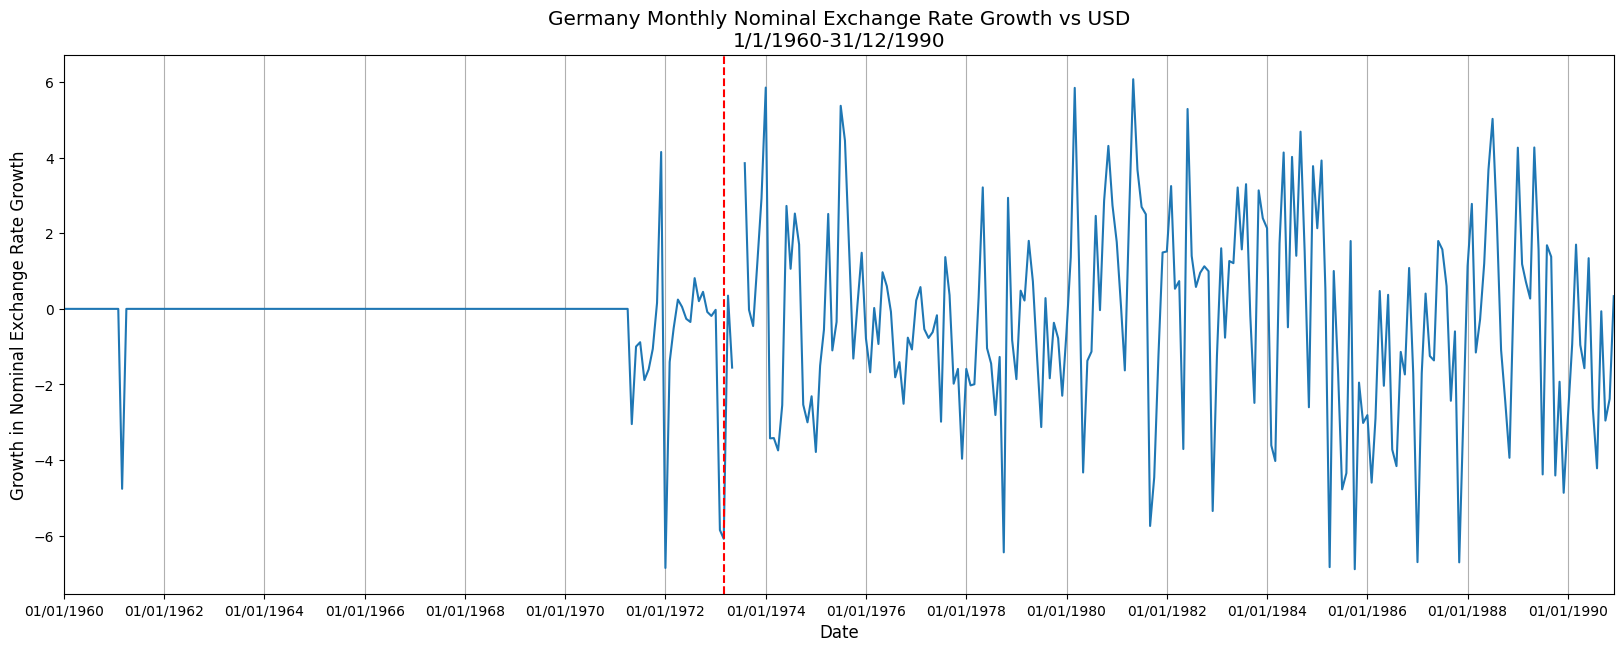

In [87]:
fig, ax = plt.subplots(figsize=(20, 7))
date_format = mdates.DateFormatter('%d/%m/%Y')
ax.xaxis.set_major_formatter(date_format)
ax.set_xlabel('Date', fontsize='large')
ax.set_ylabel('Growth in Nominal Exchange Rate Growth', fontsize='large')
ax.plot(final_merged_df['Month'], final_merged_df['Monthly Growth of Nominal Exchange Rate (%)'])
ax.set_xlim(dt.datetime(1960, 1, 1), dt.datetime(1990, 12, 1))
year_locator = mdates.YearLocator(2)
ax.xaxis.set_major_locator(year_locator)
ax.xaxis.grid(True)
plt.title('Germany Monthly Nominal Exchange Rate Growth vs USD\n1/1/1960-31/12/1990', fontsize='x-large')
plt.axvline(dt.datetime(1973,3,1), color='red', linestyle='--')
plt.show()


### Time series graph of the monthly growth in real exchange rates, versus the US dollar

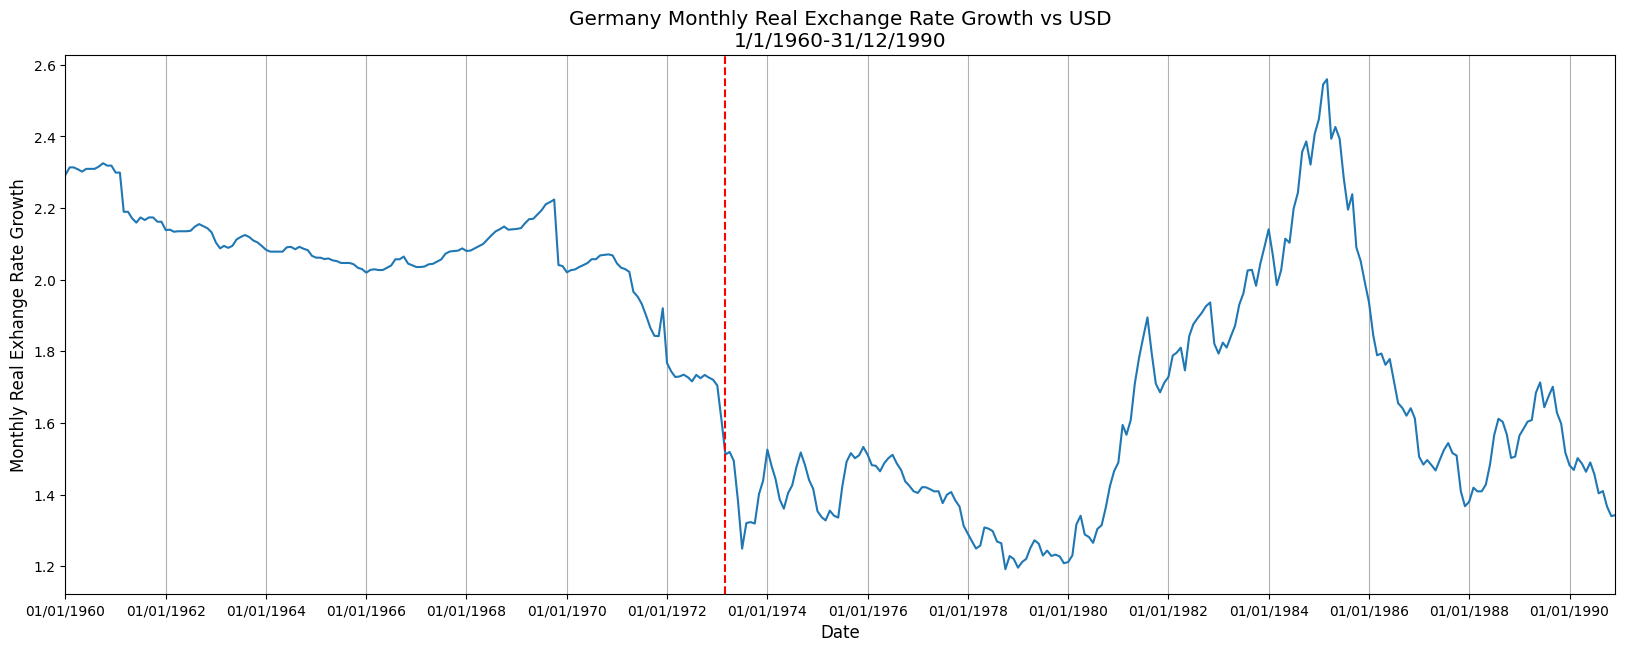

In [88]:
fig, ax = plt.subplots(figsize=(20, 7))
date_format = mdates.DateFormatter('%d/%m/%Y')
ax.xaxis.set_major_formatter(date_format)
ax.set_xlabel('Date', fontsize='large')
ax.set_ylabel('Monthly Real Exhange Rate Growth', fontsize='large')
ax.plot(final_merged_df['Month'], final_merged_df['Real Exchange Rate (%)'])
ax.set_xlim(dt.datetime(1960, 1, 1), dt.datetime(1990, 12, 1))
year_locator = mdates.YearLocator(2)
ax.xaxis.set_major_locator(year_locator)
ax.xaxis.grid(True)
plt.title('Germany Monthly Real Exchange Rate Growth vs USD\n1/1/1960-31/12/1990', fontsize='x-large')
plt.axvline(dt.datetime(1973,3,1), color='red', linestyle='--')
plt.show()

### Time series graph of the real exchange rate level, versus the US dollar

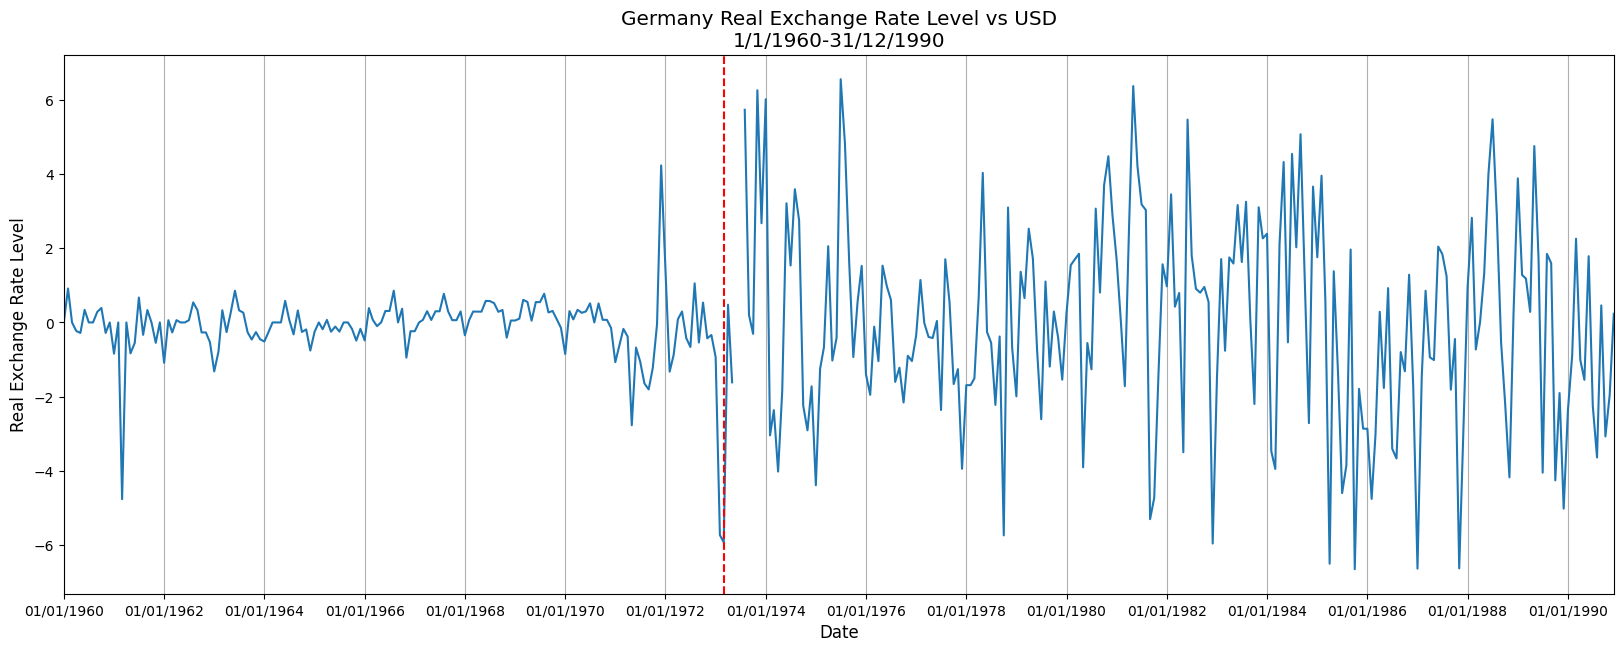

In [89]:
fig, ax = plt.subplots(figsize=(20, 7))
date_format = mdates.DateFormatter('%d/%m/%Y')
ax.xaxis.set_major_formatter(date_format)
ax.set_xlabel('Date', fontsize='large')
ax.set_ylabel('Real Exchange Rate Level', fontsize='large')
ax.plot(final_merged_df['Month'], final_merged_df['Monthly Growth in the Real Exchange Rate (%)'])
ax.set_xlim(dt.datetime(1960, 1, 1), dt.datetime(1990, 12, 1))
year_locator = mdates.YearLocator(2)
ax.xaxis.set_major_locator(year_locator)
ax.xaxis.grid(True)
plt.title('Germany Real Exchange Rate Level vs USD\n1/1/1960-31/12/1990', fontsize='x-large')
plt.axvline(dt.datetime(1973,3,1), color='red', linestyle='--')
plt.show()

### Time series graph of the monthly indexed value of international reserves of Germany and the US from January 1960 until the exit of the US from Bretton Woods.


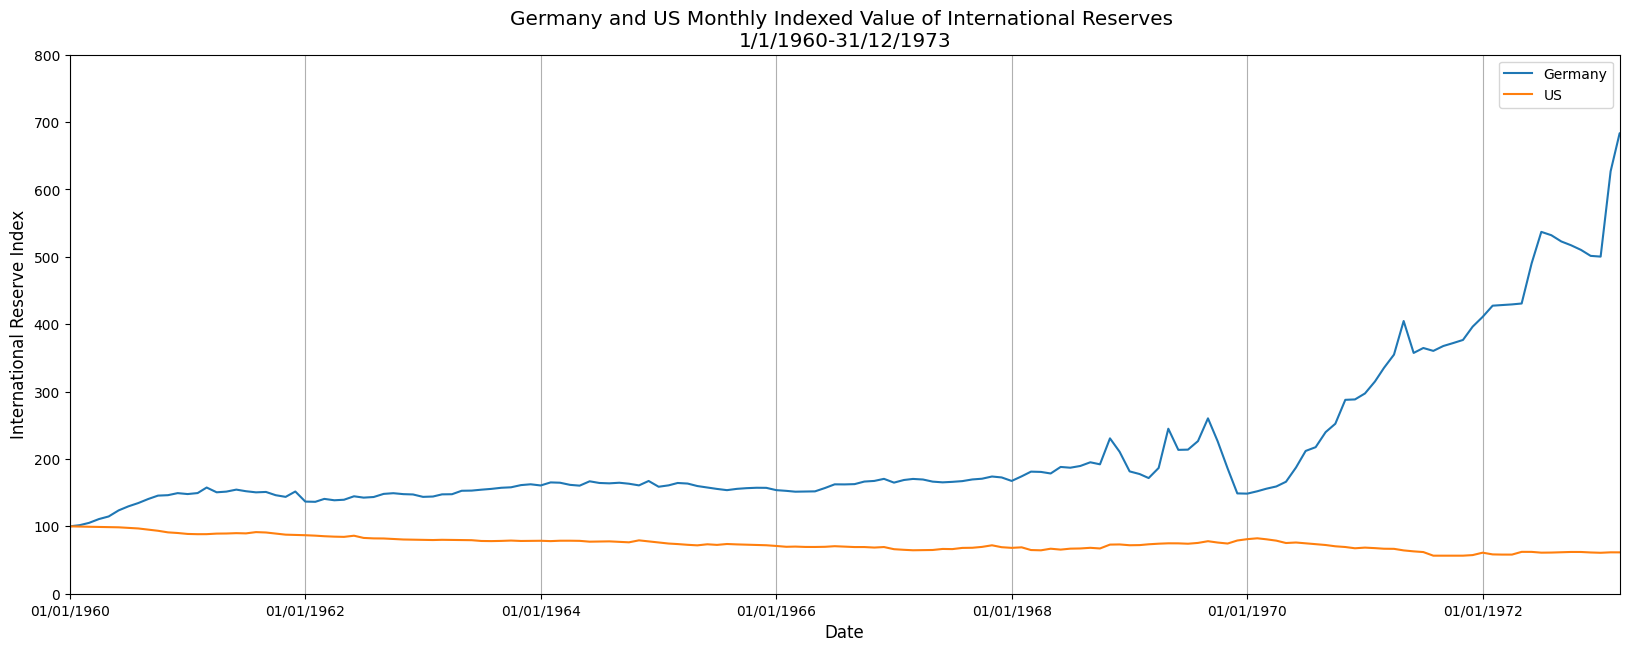

In [90]:
fig, ax = plt.subplots(figsize=(20, 7))
date_format = mdates.DateFormatter('%d/%m/%Y')
ax.xaxis.set_major_formatter(date_format)
ax.set_xlabel('Date', fontsize='large')
ax.set_ylabel('International Reserve Index', fontsize='large')
ax.plot(final_merged_df['Month'], final_merged_df['International Reserve Index Germany'], label='Germany')
ax.plot(final_merged_df['Month'], final_merged_df['International Reserve Index US'], label='US')
ax.set_xlim(dt.datetime(1960, 1, 1), dt.datetime(1973, 3, 1))
ax.set_ylim(0, 800)
year_locator = mdates.YearLocator(2)
ax.xaxis.set_major_locator(year_locator)
ax.xaxis.grid(True)
plt.title('Germany and US Monthly Indexed Value of International Reserves \n1/1/1960-31/12/1973', fontsize='x-large')
plt.legend()
plt.show()



## 5.3.2 Inflation and Industrial Production Graphs

### Time series graph of monthly inflation

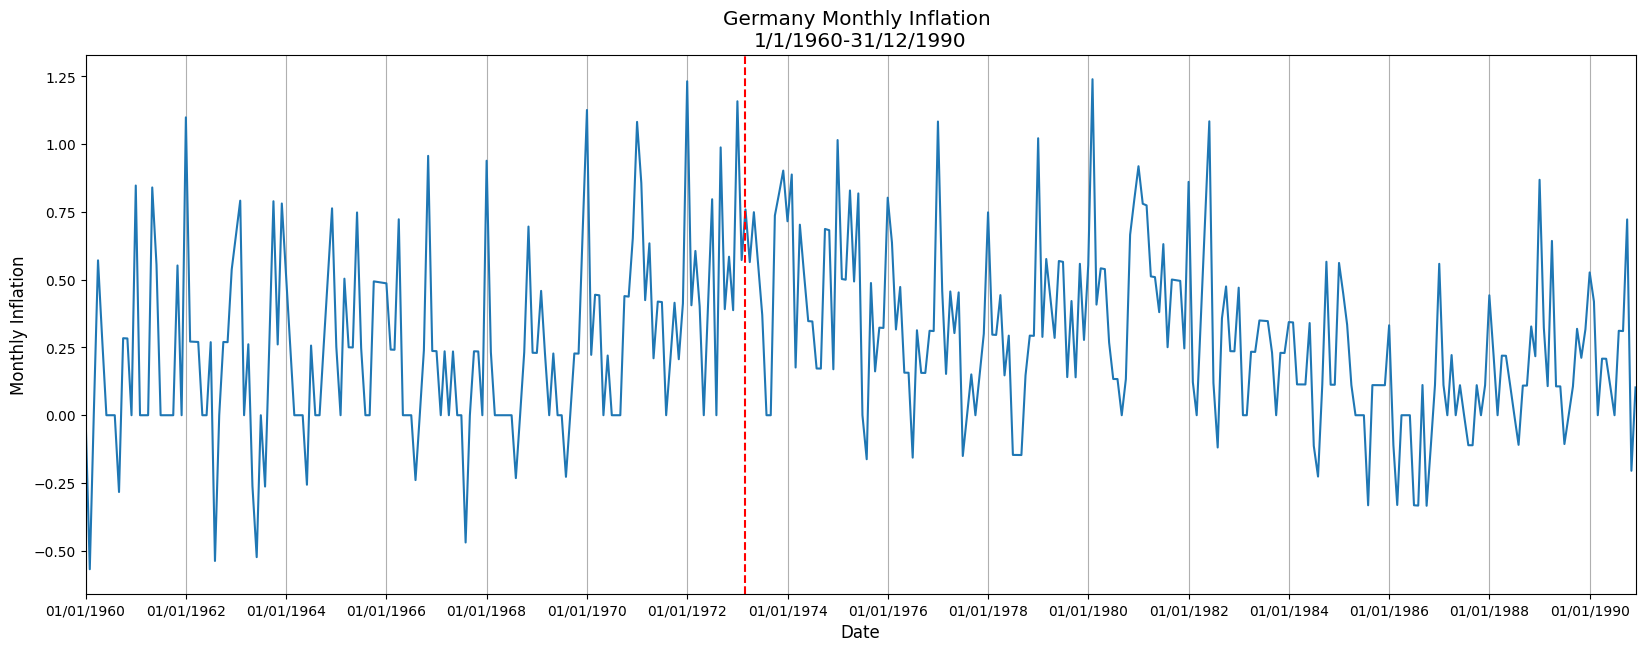

In [91]:
fig, ax = plt.subplots(figsize=(20, 7))
date_format = mdates.DateFormatter('%d/%m/%Y')
ax.xaxis.set_major_formatter(date_format)
ax.set_xlabel('Date', fontsize='large')
ax.set_ylabel('Monthly Inflation', fontsize='large')
ax.plot(final_merged_df['Month'], final_merged_df['Monthly Inflation Rate Germany(%)'])
ax.set_xlim(dt.datetime(1960, 1, 1), dt.datetime(1990, 12, 1))
year_locator = mdates.YearLocator(2)
ax.xaxis.set_major_locator(year_locator)
ax.xaxis.grid(True)
plt.title('Germany Monthly Inflation \n1/1/1960-31/12/1990', fontsize='x-large')
plt.axvline(dt.datetime(1973,3,1), color='red', linestyle='--')
plt.show()

### Time series graph of the monthly growth in industrial production

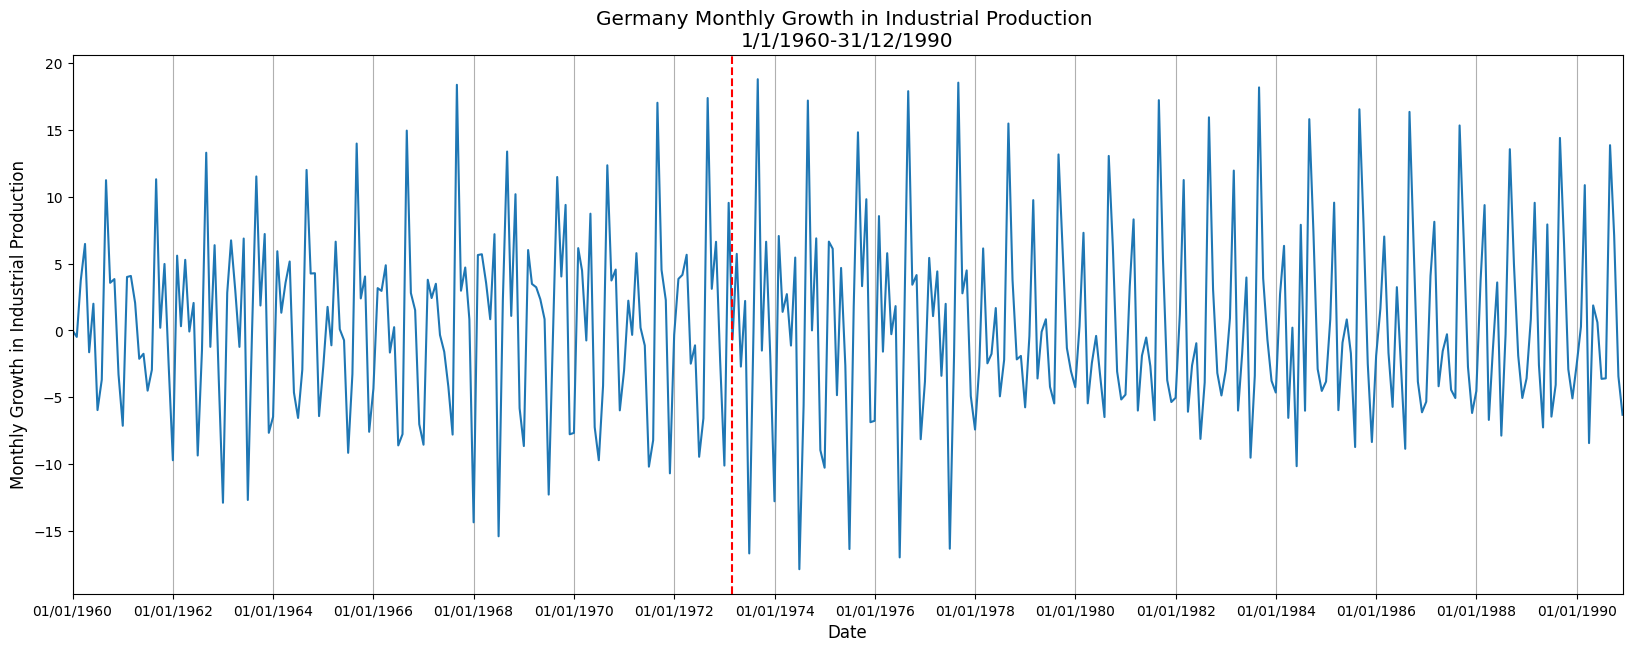

In [92]:
fig, ax = plt.subplots(figsize=(20, 7))
date_format = mdates.DateFormatter('%d/%m/%Y')
ax.xaxis.set_major_formatter(date_format)
ax.set_xlabel('Date', fontsize='large')
ax.set_ylabel('Monthly Growth in Industrial Production', fontsize='large')
ax.plot(final_merged_df['Month'], final_merged_df['Monthly Growth in Industrial Production (%)'])
ax.set_xlim(dt.datetime(1960, 1, 1), dt.datetime(1990, 12, 1))
year_locator = mdates.YearLocator(2)
ax.xaxis.set_major_locator(year_locator)
ax.xaxis.grid(True)
plt.title('Germany Monthly Growth in Industrial Production \n1/1/1960-31/12/1990', fontsize='x-large')
plt.axvline(dt.datetime(1973,3,1), color='red', linestyle='--')
plt.show()

### Time series graph of the growth in industrial production versus 12 months ago

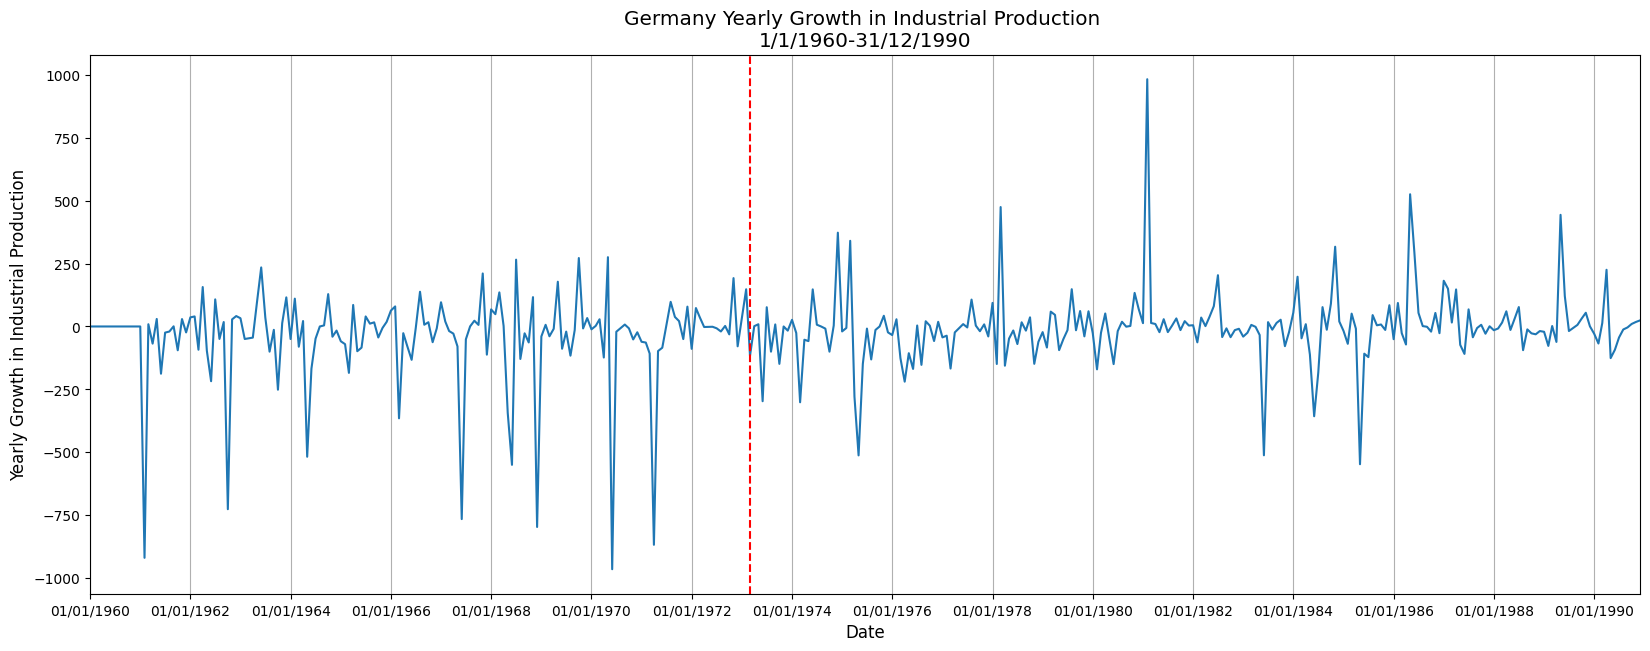

In [93]:
fig, ax = plt.subplots(figsize=(20, 7))
date_format = mdates.DateFormatter('%d/%m/%Y')
ax.xaxis.set_major_formatter(date_format)
ax.set_xlabel('Date', fontsize='large')
ax.set_ylabel('Yearly Growth in Industrial Production', fontsize='large')
ax.plot(final_merged_df['Month'], final_merged_df['Yearly Growth of Industrial Production (%)'])
ax.set_xlim(dt.datetime(1960, 1, 1), dt.datetime(1990, 12, 1))
year_locator = mdates.YearLocator(2)
ax.xaxis.set_major_locator(year_locator)
ax.xaxis.grid(True)
plt.title('Germany Yearly Growth in Industrial Production \n1/1/1960-31/12/1990', fontsize='x-large')
plt.axvline(dt.datetime(1973,3,1), color='red', linestyle='--')
plt.show()

## 5.3.3 Comparison statistics

### Finding the standard deviations before and after the Bretton Woods agremment

In [94]:
#Standard deviation before the Bretton Woods agreement
def calculate_std_dev_before(df, column):
    #Before the Bretton Woods agreement
    start_date = pd.to_datetime('1960-01-01')
    end_date = pd.to_datetime('1971-07-01')
    data = df[(df['Month'] >= start_date) & (df['Month'] <= end_date)][column]
    std_dev_before_BW = data.std()
    return std_dev_before_BW


#Standard deviation after the Bretton Woods agreement
def calculate_std_dev_after(df, column):
    start_date = pd.to_datetime('1973-01-01')
    end_date = pd.to_datetime('1990-12-01')
    data = df[(df['Month'] >= start_date) & (df['Month'] <= end_date)][column]
    std_dev_after_BW = data.std()
    return std_dev_after_BW

In [95]:
#Make a column for the difference between the inflation in Germany versus the United States
final_merged_df['Inflation Difference'] = final_merged_df['Monthly Inflation Rate Germany(%)'] - final_merged_df['Monthly Inflation Rate US(%)']

display(final_merged_df)

,Month,Monthly Growth of Nominal Exchange Rate (%),Real Exchange Rate (%),Monthly Growth in the Real Exchange Rate (%),Monthly Inflation Rate Germany(%),Monthly Growth in Industrial Production (%),Yearly Growth of Industrial Production (%),International Reserve Index Germany,Monthly Inflation Rate US(%),International Reserve Index US,Inflation Difference
0,1960-01-01,0.000000e+00,2.292535,0.000000,0.000000,0.000000,0.000000,100.000000,0.000000,100.000000,0.000000
1,1960-02-01,0.000000e+00,2.313504,0.914640,-0.568147,-0.488181,0.000000,101.740143,0.341297,99.616353,-0.909444
2,1960-03-01,0.000000e+00,2.313504,0.000000,0.000000,3.743868,0.000000,105.128964,0.000000,99.378902,0.000000
3,1960-04-01,0.000000e+00,2.308184,-0.229943,0.571393,6.470881,0.000000,110.837171,0.340136,99.068353,0.231257
4,1960-05-01,0.000000e+00,2.301645,-0.283291,0.284096,-1.636279,0.000000,114.667934,0.000000,98.864890,0.284096
5,1960-06-01,0.000000e+00,2.309447,0.338983,0.000000,1.996198,0.000000,123.699708,0.338983,98.564584,-0.338983
6,1960-07-01,0.000000e+00,2.309447,0.000000,0.000000,-5.964585,0.000000,129.647048,0.000000,97.771218,0.000000
7,1960-08-01,0.000000e+00,2.309447,0.000000,0.000000,-3.691774,0.000000,134.599299,0.000000,96.858661,0.000000
8,1960-09-01,0.000000e+00,2.316008,0.284096,-0.283291,11.242604,0.000000,140.623493,0.000000,95.120146,-0.283291
9,1960-10-01,0.000000e+00,2.325052,0.390470,0.284096,3.561517,0.000000,145.612219,0.675676,93.435639,-0.391579


### Make a dataframe to store the standard deviations

In [96]:
stds_before =[]
stds_after = []

#Calculate the standards deviation for the required columns
required_columns = ['Monthly Growth of Nominal Exchange Rate (%)', 'Monthly Growth in the Real Exchange Rate (%)', 'Monthly Inflation Rate Germany(%)', 'Inflation Difference', 'Yearly Growth of Industrial Production (%)']

#Calculate the standard deviation for the required columns
for column in required_columns:
    std_dev_before = calculate_std_dev_before(final_merged_df, column)
    std_dev_after = calculate_std_dev_after(final_merged_df, column)
    #Append the values to the lists
    stds_before.append(std_dev_before)
    stds_after.append(std_dev_after)

#Make a dataframe to display the standard deviations
std_devs_df = pd.DataFrame({'Column': required_columns, 'Standard Deviation Before Bretton Woods': stds_before, 'Standard Deviation After Bretton Woods': stds_after})    

display(std_devs_df)

,Column,Standard Deviation Before Bretton Woods,Standard Deviation After Bretton Woods
0,Monthly Growth of Nominal Exchange Rate (%),0.489539,2.705253
1,Monthly Growth in the Real Exchange Rate (%),0.627903,2.764715
2,Monthly Inflation Rate Germany(%),0.330045,0.306371
3,Inflation Difference,0.400093,0.370368
4,Yearly Growth of Industrial Production (%),203.152503,142.325444


### Find the ratios of the standard deviations

In [97]:
#Calculate the standard deviation after and before the Bretton Woods agreement
def calculate_ratio(row):
    return row['Standard Deviation After Bretton Woods'] / row['Standard Deviation Before Bretton Woods']

#Add the ratios to the dataframe
std_devs_df['Ratio'] = std_devs_df.apply(calculate_ratio, axis=1)

display(std_devs_df)


,Column,Standard Deviation Before Bretton Woods,Standard Deviation After Bretton Woods,Ratio
0,Monthly Growth of Nominal Exchange Rate (%),0.489539,2.705253,5.526119
1,Monthly Growth in the Real Exchange Rate (%),0.627903,2.764715,4.403095
2,Monthly Inflation Rate Germany(%),0.330045,0.306371,0.928271
3,Inflation Difference,0.400093,0.370368,0.925706
4,Yearly Growth of Industrial Production (%),203.152503,142.325444,0.700584
